<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Altair Demo

Week 3 | Lesson 2.1

The below notebook is mainly refactored examples from the Altair Github documentation:

* [Altair Introduction](https://github.com/altair-viz/altair/blob/273a1fcf9cec1956474af755d5fe32f0e3f0aee8/altair/notebooks/02-Introduction.ipynb)
* [Car example](https://github.com/altair-viz/altair/blob/273a1fcf9cec1956474af755d5fe32f0e3f0aee8/altair/notebooks/09-CarsDataset.ipynb)

### Package Installation 
First thing first. Let's install Altair. From the command line first make sure you are in your DSI environment and then install Altair.  

* source activate DSI
* pip install Altair

Okay let's load up Altair and some data to start exploring

In [1]:
from altair import *
import pandas as pd

demo_data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7],
                     'c': [1, 1, 1, 1, 1, 2, 2, 2, 2]})

In [2]:
demo_data

,a,b,c
0,C,2,1
1,C,7,1
2,C,4,1
3,D,1,1
4,D,2,1
5,D,6,2
6,E,8,2
7,E,4,2
8,E,7,2


The fundamental object in Altair is a chart. It takes a data frame as a single chart. Fundamentally, a Chart is an object which knows how to emit a JSON dictionary representing the data and visualization encodings (see below), which can be sent to the notebook and rendered by the Vega-Lite JavaScript library.
Here is what that JSON looks like for the current chart:

In [3]:
demo_chart = Chart(demo_data)
demo_chart.to_dict()

{'data': {'values': [{'a': 'C', 'b': 2, 'c': 1},
   {'a': 'C', 'b': 7, 'c': 1},
   {'a': 'C', 'b': 4, 'c': 1},
   {'a': 'D', 'b': 1, 'c': 1},
   {'a': 'D', 'b': 2, 'c': 1},
   {'a': 'D', 'b': 6, 'c': 2},
   {'a': 'E', 'b': 8, 'c': 2},
   {'a': 'E', 'b': 4, 'c': 2},
   {'a': 'E', 'b': 7, 'c': 2}]}}

### Chart Mark 
The first thing you need to determine is the chart mark you want to use to represent your data. For example we can choose the point mark to represent each data point, similar to a scatter plot in 

Next we can decide what sort of mark we would like to use to represent our data. For example, we can choose the point mark to represent each data as a point on the plot:

In [4]:
demo_chart = Chart(demo_data).mark_point()
demo_chart

So what we managed to plot above was 9 circles on top of each other. Not particularly interesting. That said one thing to note is we can see the JSON representation has a new attribute of mark:point

In [5]:
demo_chart.to_dict()

{'data': {'values': [{'a': 'C', 'b': 2, 'c': 1},
   {'a': 'C', 'b': 7, 'c': 1},
   {'a': 'C', 'b': 4, 'c': 1},
   {'a': 'D', 'b': 1, 'c': 1},
   {'a': 'D', 'b': 2, 'c': 1},
   {'a': 'D', 'b': 6, 'c': 2},
   {'a': 'E', 'b': 8, 'c': 2},
   {'a': 'E', 'b': 4, 'c': 2},
   {'a': 'E', 'b': 7, 'c': 2}]},
 'mark': 'point'}

#### Chart mark types:

There are a number of chart mark types. For now we will stick with point mark which is the equivalent of a scatter plot in matplotlib. 

Here are some of the more commonly used `mark_*()` methods supported in Altair and Vega-Lite; for more detail see [Markings](https://altair-viz.github.io/documentation/marks.html) in the Altair documentation:

<table>
  <tr>
    <th>Method</th>
  </tr>
  <tr>
    <td><code>mark_area()</code></td>
  </tr>
  <tr>
    <td><code>mark_bar()</code></td>
  </tr>
  <tr>
    <td><code>mark_circle()</code></td>
  </tr>
  <tr>
    <td><code>mark_line()</code></td>
  </tr>
  <tr>
    <td><code>mark_point()</code></td>
  </tr>
  <tr>
    <td><code>mark_rule()</code></td>
  </tr>
  <tr>
    <td><code>mark_square()</code></td>
  </tr>
  <tr>
    <td><code>mark_text()</code></td>
  </tr>
  <tr>
    <td><code>mark_tick()</code></td>
  </tr>
</table>

### Data Encoding

So now that we know how to make a scatter plot let's see if we can figure out how to do a litle better than 7 overlapping circles.

The next step is to add *visual encodings* (or *encodings* for short) to the chart. A visual encoding specifies how a given data column should be mapped onto the visual properties of the visualization.
Some of the more frequenty used visual encodings are listed here:

* X: x-axis value
* Y: y-axis value
* Color: color of the mark
* Opacity: transparency/opacity of the mark
* Shape: shape of the mark
* Size: size of the mark
* Row: row within a grid of facet plots
* Column: column within a grid of facet plots

For a complete list of these encodings, see the [Encodings](https://altair-viz.github.io/documentation/encoding.html) section of the documentation.

Visual encodings can be created with the `encode()` method of the `Chart` object. For example, we can start by mapping the `y` axis of the chart to column `a`:

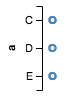

In [6]:
demo_chart = Chart(demo_data).mark_point().encode(y='a')
demo_chart

Now let's take a look at our JSON representation of the chart object. The result is the same as above with the addition of the `'encoding'` key, which specifies the visualization channel (`y`), the name of the field (`a`), and the type of the variable (`nominal`).

Altair is able to automatically determine the type of the variable using built-in heuristics. Altair and Vega-Lite support four primitive data types:

<table>
  <tr>
    <th>Data Type</th>
    <th>Code</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>quantitative</td>
    <td>Q</td>
    <td>Number (real-valued)</td>
  </tr>
  <tr>
    <td>nominal</td>
    <td>N</td>
    <td>Unordered categorical</td>
  </tr>
  <tr>
    <td>ordinal</td>
    <td>O</td>
    <td>Ordered categorial</td>
  </tr>
  <tr>
    <td>temporal</td>
    <td>T</td>
    <td>Date/time</td>
  </tr>
</table>

You can set the data type of a column explicitly using a one letter code as follows:

**demo_chart(data).mark_point().encode(y='a:N')**

In [7]:
demo_chart.to_dict()

{'data': {'values': [{'a': 'C', 'b': 2, 'c': 1},
   {'a': 'C', 'b': 7, 'c': 1},
   {'a': 'C', 'b': 4, 'c': 1},
   {'a': 'D', 'b': 1, 'c': 1},
   {'a': 'D', 'b': 2, 'c': 1},
   {'a': 'D', 'b': 6, 'c': 2},
   {'a': 'E', 'b': 8, 'c': 2},
   {'a': 'E', 'b': 4, 'c': 2},
   {'a': 'E', 'b': 7, 'c': 2}]},
 'encoding': {'y': {'field': u'a', 'type': 'nominal'}},
 'mark': 'point'}

Next up let's encode X as well

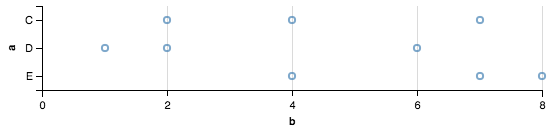

In [8]:
demo_chart = Chart(demo_data).mark_point().encode(y='a',x='b')
demo_chart

Now what if I want to know the average of B per A. With Altair we do not have to use groupby on the data frame and plot the resulting dataframe. Instead we can specify that we want to use the aggregate function within the encoding of the chart. 

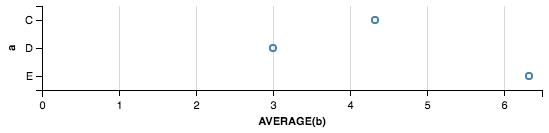

In [9]:
demo_chart = Chart(demo_data).mark_point().encode(y='a',x='average(b)')
demo_chart

So far so good. What if we want to break out the data by category(column C). Altair gives us multiple ways to do this. We can use color, shape, row, and column to subset the data. Examples below:

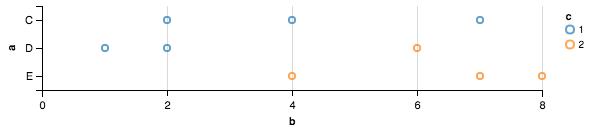

In [10]:
demo_chart = Chart(demo_data).mark_point().encode(y='a',x='b',color='c:N')
demo_chart

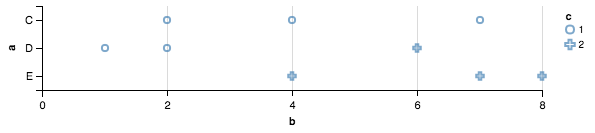

In [11]:
demo_chart = Chart(demo_data).mark_point().encode(y='a',x='b',shape='c:N')
demo_chart

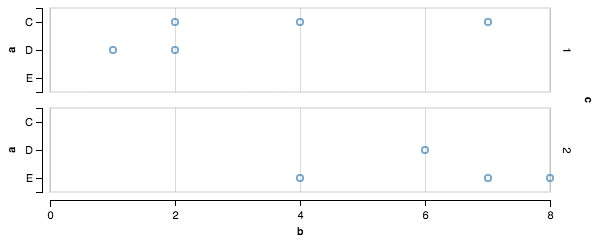

In [12]:
demo_chart = Chart(demo_data).mark_point().encode(y='a',x='b',row='c:N')
demo_chart

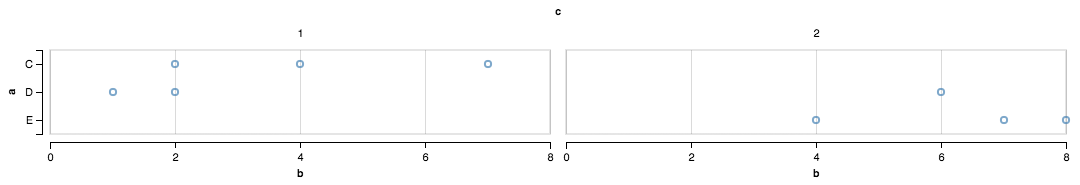

In [13]:
demo_chart = Chart(demo_data).mark_point().encode(y='a',x='b',column='c:N')
demo_chart

That was fun. Not let's get crazy and try and create a bar chart. 

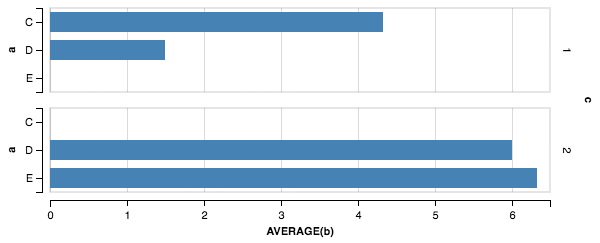

In [14]:
demo_chart = Chart(demo_data).mark_bar().encode(y='a',x='average(b)', row='c:N')
demo_chart

One chart type in Altair that is a bit trickier is a basic histogtram. You can achieve this using a bar plot with a little bit of tweaking. Notice for X we are using bin=True to effectively groupby horsepower(using a range defined by Altair on the fly) and the aggregate function count for y. 

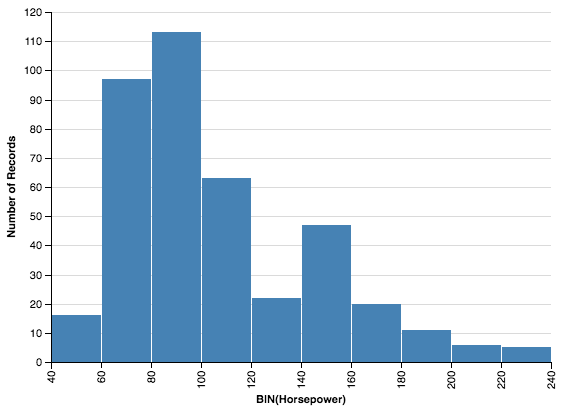

In [15]:
cars = load_dataset('cars')

Chart(cars).mark_bar().encode(
    X('Horsepower', bin=True),
    y='count(*):Q')

If we want more granular control over how the bins are set up we can pass a Bin object to bin. We can also use the axis object to control the labels. 

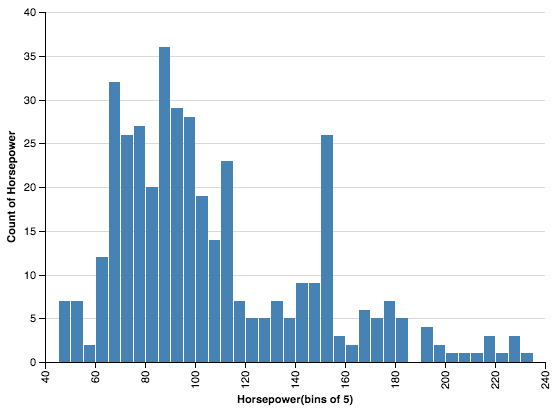

In [16]:
Chart(cars).mark_bar().encode(
    X('Horsepower', bin=Bin(step=5),title='Horsepower(bins of 5)'),
    Y('count(*):Q',title='Count of Horsepower'))

## Group Practice (Using Cars Dataset)

In a scatter plot plot weight(x) versus acceleration(y) subset by cyliners(color). 

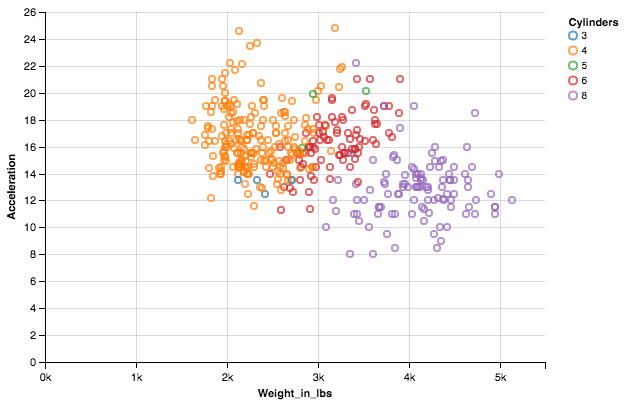

In [17]:
Chart(cars).mark_point().encode(
    x='Weight_in_lbs',
    y='Acceleration',
    color='Cylinders:N'
)

Next plot displacement (x) versus weight(y) breaking down by horsepower(color). Further break this down across origin(row).

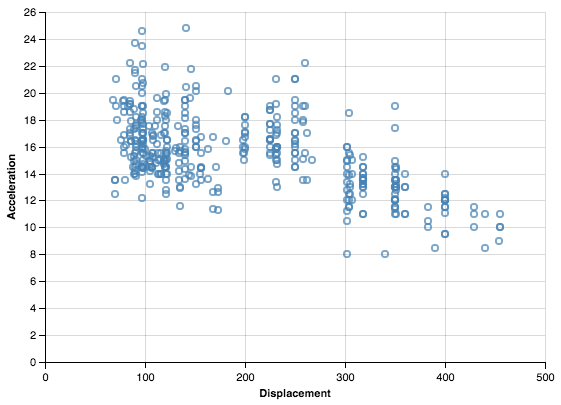

In [18]:
Chart(cars).mark_point().encode(
    x='Displacement',
    y='Acceleration',
)

This is a little surprising as you would expect larger displacement to be related to larger engines that have more horsepower, which would give rise to greater acceleration. Instead, larger engines have smaller acceleration. To understand what is going on, let's start to include both the horsepower and the geographical region in the visualization:

Let's plot displacement(X) versus weight(Y) broken down by horsepower(color) and subset into three rows by origin.

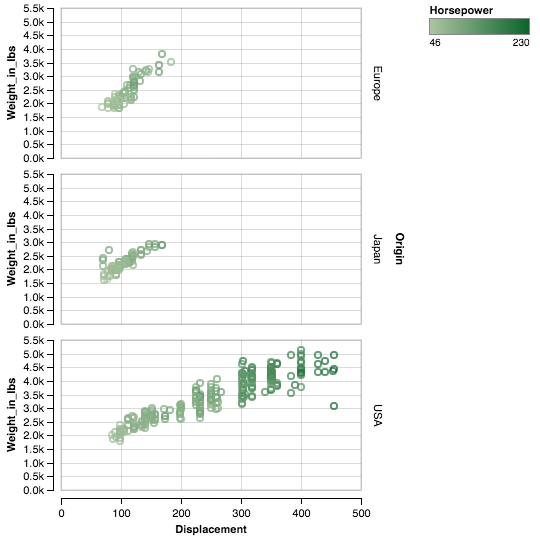

In [19]:
Chart(cars).mark_point().encode(
    x='Displacement',
    y='Weight_in_lbs',
    color='Horsepower',
    row='Origin'
).configure_cell(width=300, height=150)

This shows a lot:

<ol>
<li>The larger displayment engines that have more horsepower are from the United States.</li>
<li>The cars from Japan and Europe have smaller displacement/horsepower engine and are lighter.</li>
<li>It is exactly the large horsepower cars from the United States that are heavier. Thus, even though they have more horsepower, their excess weight causes them to be slower than their smaller horsepower peers.</li>
</ol>

Thus, it appears that one of the main trends in this dataset is the difference in cars between geographic regions. Let's see if this also holds true in the cylinders of the engines by looking at a normalized stacked bar chart:

For this encode Origin as Y, X will be X('*:Q', aggregate='count', sort='descending'), and color will be cylinders. Another hint is that to normalize you can pass stacked='normalize' to the mark_bar method.  

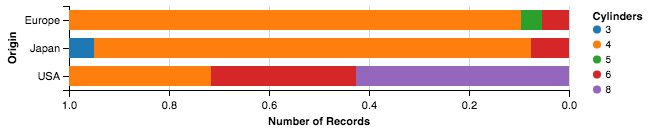

In [20]:
Chart(cars).mark_bar(stacked='normalize').encode(
    Y('Origin'),
    X('*:Q', aggregate='count', sort='descending'),
    Color('Cylinders:N')
)

### Further reading and documentation:

* [Altair Documentation](https://altair-viz.github.io/)
* [Altair GitHub home page](https://github.com/altair-viz/altair/tree/273a1fcf9cec1956474af755d5fe32f0e3f0aee8)
* [Example Gallery](https://altair-viz.github.io/gallery/index.html#statistical)
* [Altair Recipe Book](https://altair-viz.github.io/recipes.html)
* [Pbpython Examples](http://pbpython.com/altair-intro.html)